In [1]:
from pandas import read_csv, DataFrame
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

input_df = pd.read_excel('/default_of_credit_card_clients.xlsx', header=1)

In [3]:
y = input_df.pop('default payment next month')
X = input_df

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Стандартизация
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [6]:
pca_test = PCA(n_components=10)
pca_test.fit(X_train_scaled)

PCA(n_components=10)

In [7]:
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train_scaled,y_train)
y_pred = clf.predict(X_test_scaled)
y_pred_train = clf.predict(X_train_scaled)

In [8]:
print("ROC AUC test:",metrics.roc_auc_score(y_test, y_pred))
print("ROC AUC train:",metrics.roc_auc_score(y_train, y_pred_train))

ROC AUC test: 0.6485408628528399
ROC AUC train: 0.6643585306217898


In [9]:
importances = clf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
forest_importances.sort_values(ascending=False)

PAY_0        0.768658
PAY_2        0.144481
PAY_AMT2     0.051086
PAY_6        0.018539
PAY_3        0.012090
BILL_AMT5    0.005145
ID           0.000000
BILL_AMT3    0.000000
PAY_AMT5     0.000000
PAY_AMT4     0.000000
PAY_AMT3     0.000000
PAY_AMT1     0.000000
BILL_AMT6    0.000000
BILL_AMT4    0.000000
BILL_AMT1    0.000000
BILL_AMT2    0.000000
LIMIT_BAL    0.000000
PAY_5        0.000000
PAY_4        0.000000
AGE          0.000000
MARRIAGE     0.000000
EDUCATION    0.000000
SEX          0.000000
PAY_AMT6     0.000000
dtype: float64

In [10]:
dot_data = \
    export_graphviz(
        clf,
        out_file=None,
        feature_names=X.columns,
        filled=True,
        impurity=False,
        rounded=True
    )

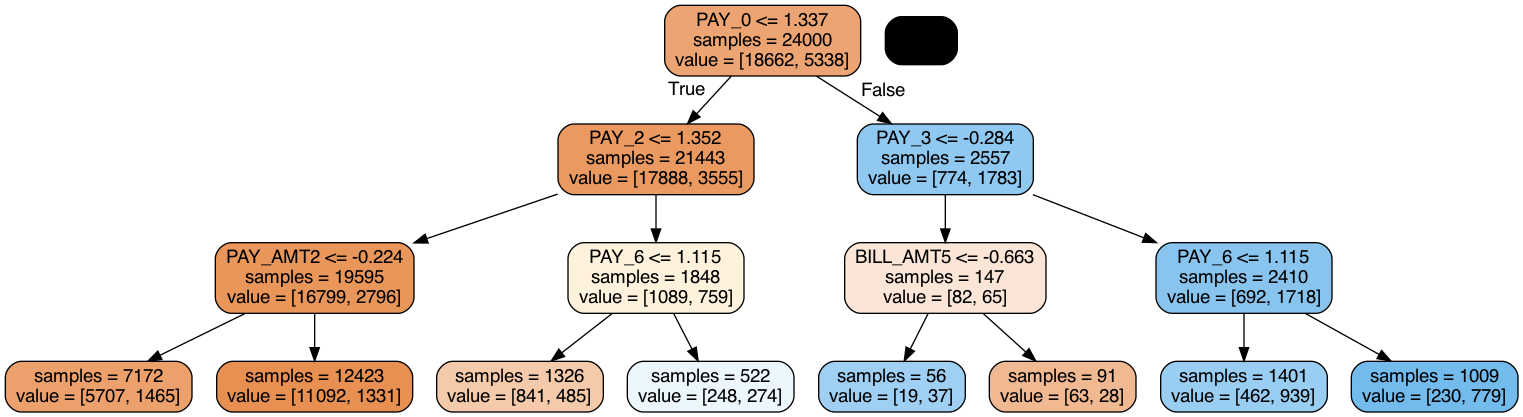

In [14]:
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor("#FFF2DD")  
Image(graph.create_png())